<a href="https://colab.research.google.com/drive/1vusSyyw3Go5QPv4Z2CgqTM92jx_-Ogm6#scrollTo=qPPmu-XeBzy0" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

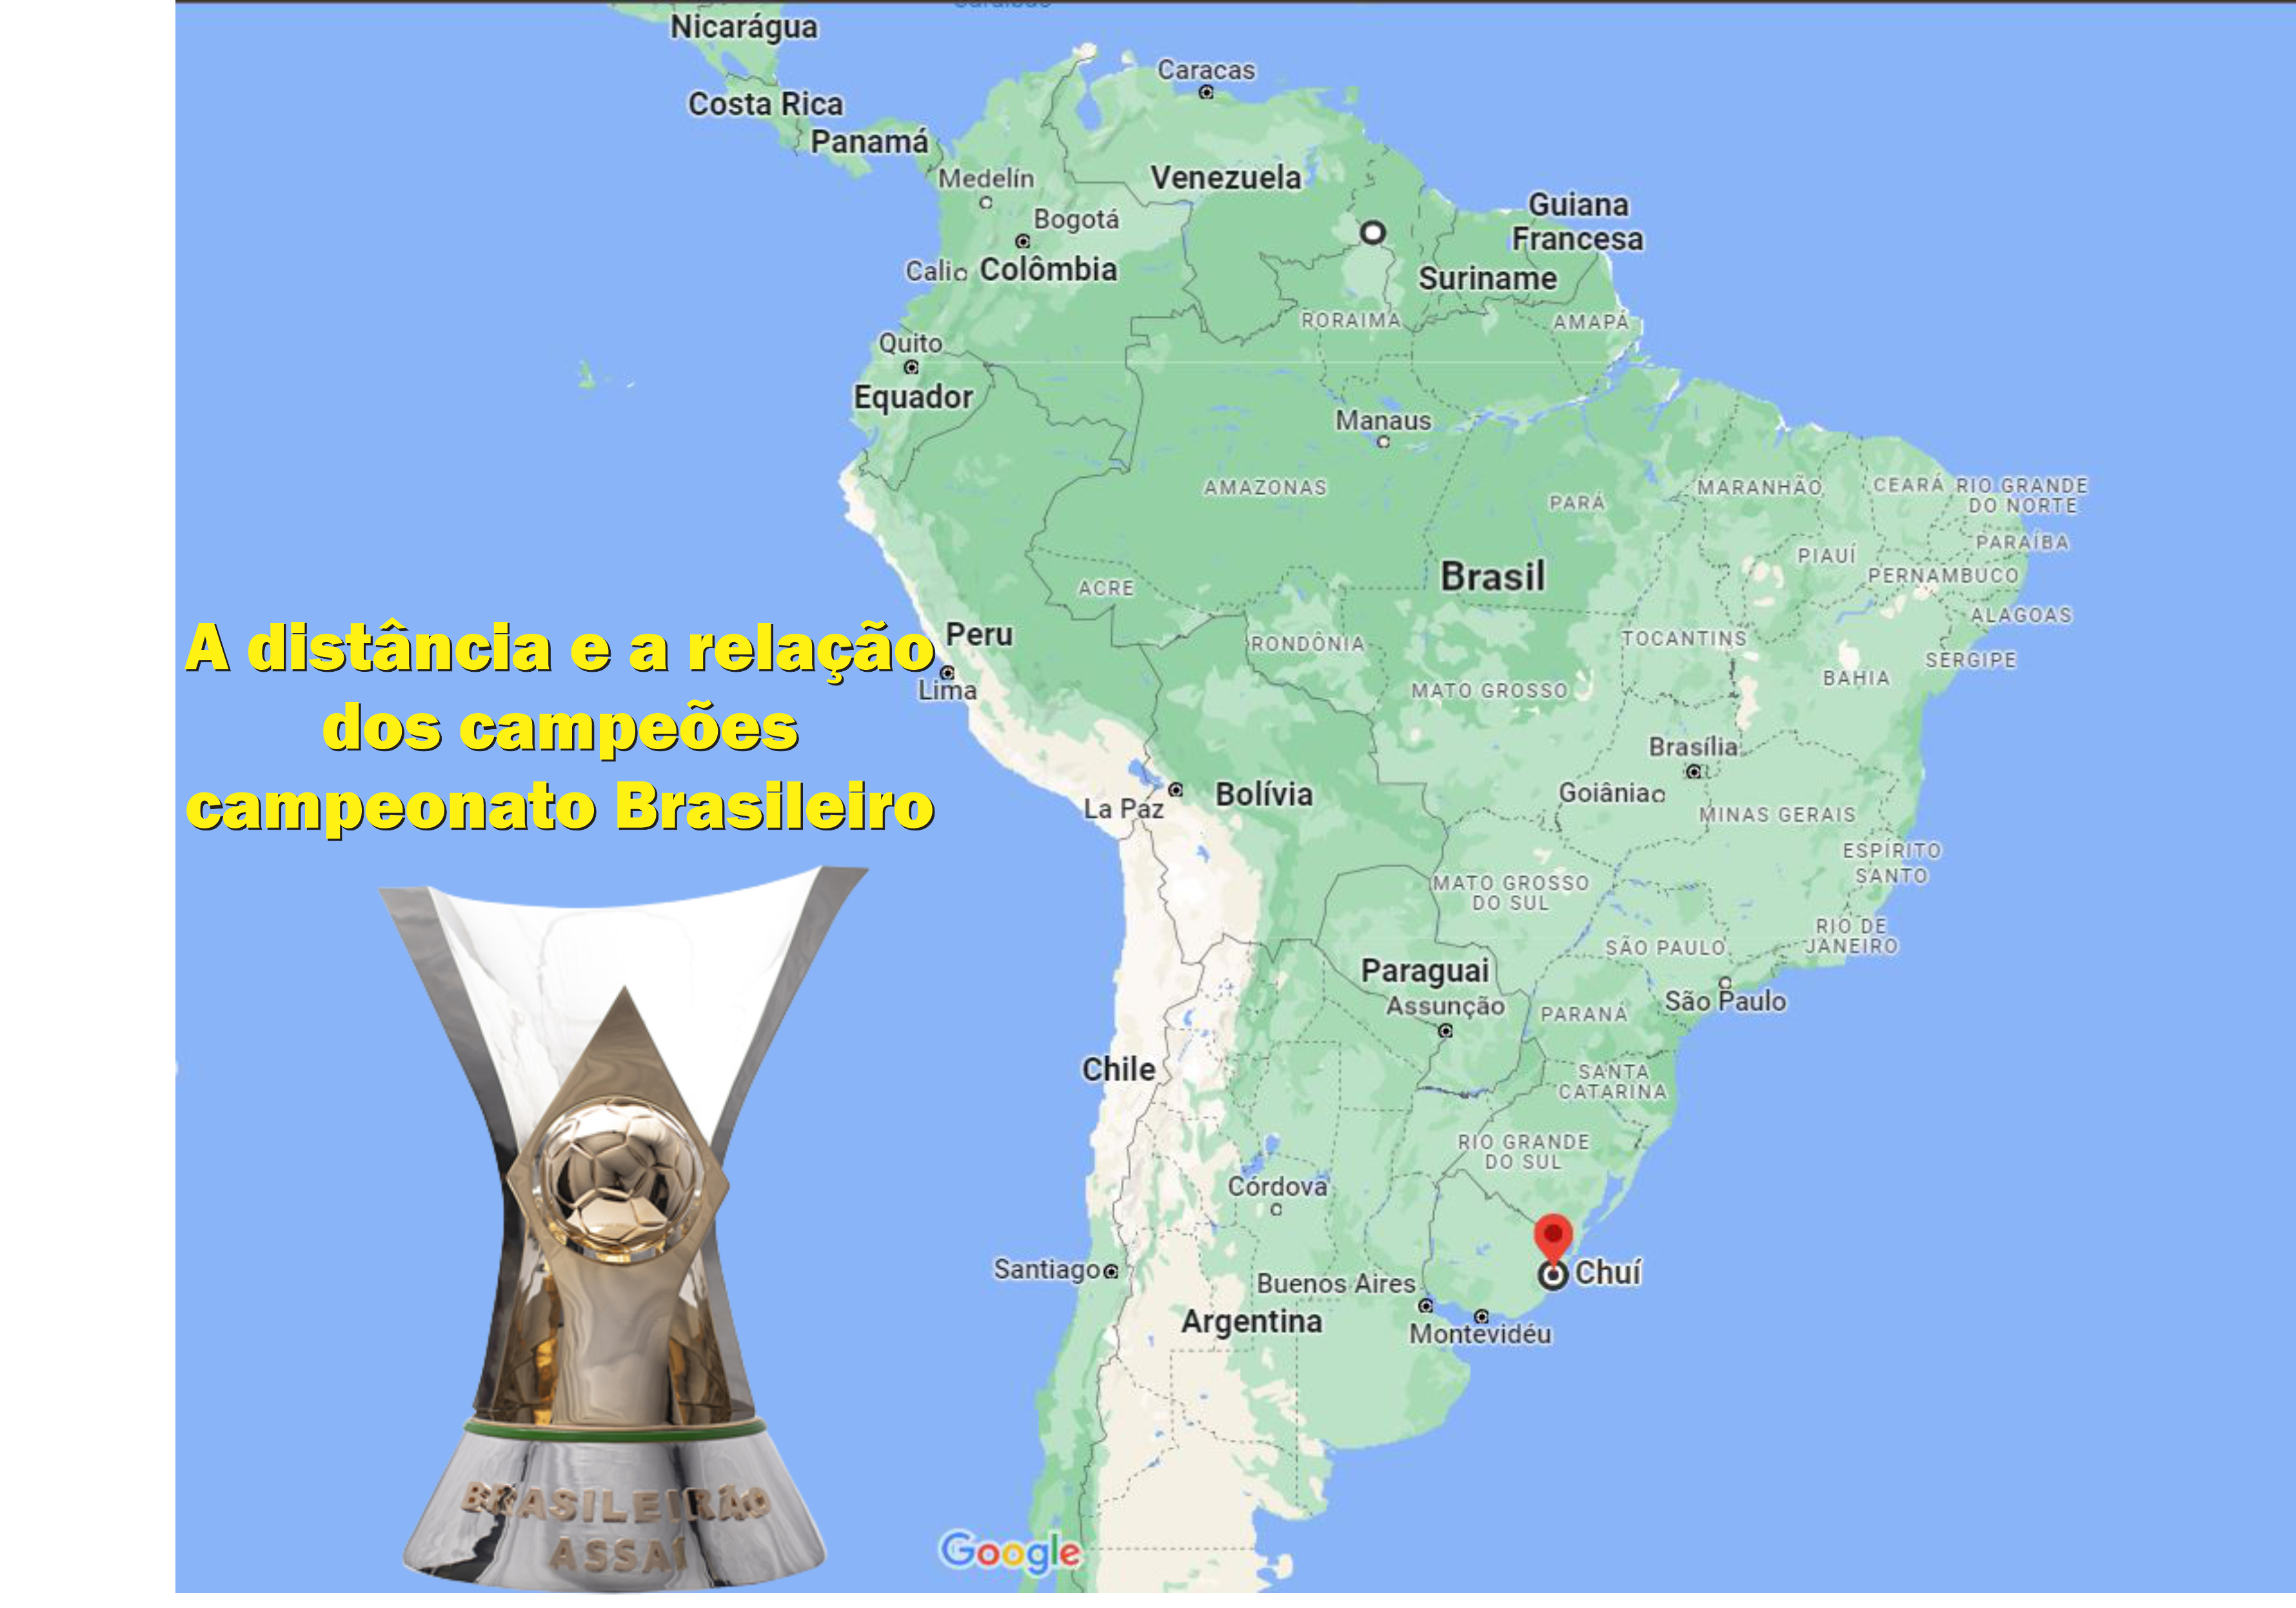

In [74]:
#importar as bibliotecas
from geopy.distance import geodesic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Gerando o mapa do Brasil
mapa = folium.Map(
    width=1000, height=800,
    location=[-15.77972, -47.92972], 
    zoom_start=4
)

In [3]:
#Ler coordenadas estadios dos times
estadios = pd.read_csv('/content/drive/MyDrive/data_sets/futebol/estadios.csv', sep=';')
estadios.head()

Cl             Squad                                    Coord
0   1   América Mineiro     -19.908568980824, -43.91797947216970
1   2         Athletico  -25.448056571685500, -49.27650380664890
2   3  Atlético Mineiro                       -19.9301, -44.0138
3   4             Bahia                       -12.9790, -38.5042
4   5          Botafogo                       -22.8932, -43.2925

In [4]:
#Adcionando os brasões dos times ao mapa
america = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/América Mineiro.png', icon_size=(70, 70))
folium.Marker(
    [-19.908568980824, -43.91797947216970],
    icon=america
).add_to(mapa)

athetico = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Athletico.png', icon_size=(50, 50)) 
folium.Marker(
    [-25.448056571685500, -49.27650380664890],
    icon=athetico
).add_to(mapa)

galo = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Atlético Mineiro.png', icon_size=(80,80)) 
folium.Marker(
    [-19.9301, -44.0138],
    icon=galo
).add_to(mapa)

bahia = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Bahia.png', icon_size=(50, 50)) 
folium.Marker(
    [-12.9790, -38.5042],
    popup='<i>Arena da Fonte Nova</i>',
    tooltip='Bahia',
    icon=bahia
).add_to(mapa)

fogo = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Botafogo.png', icon_size=(50, 50)) 
folium.Marker(
    [-22.8932, -43.2925],
    popup='<i>Arena Nilton Santos</i>',
    tooltip='Botafogo',
    icon=fogo
).add_to(mapa)

braga = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Bragantino.png', icon_size=(50, 50)) 
folium.Marker(
    [-22.96518763106780, -46.53660336864000],
    popup='<i>Arena Red Bull</i>',
    tooltip='Bragantino',
    icon=braga
).add_to(mapa)

Corintia = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Corinthians.png', icon_size=(50, 50)) 
folium.Marker(
    [-23.5451, -46.4741],
    popup='<i>Neo Quimica Arena</i>',
    tooltip='Corinthians',
    icon=Corintia
).add_to(mapa)

Coxa = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Coritiba.png', icon_size=(50, 50)) 
folium.Marker(
    [-25.420806583550785, -49.2594633832257],
    popup='<i>Arena Couto Pereira</i>',
    tooltip='Coritiba',
    icon=Coxa
).add_to(mapa)

zero = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Cruzeiro.png', icon_size=(50, 50)) 
folium.Marker(
    [-19.865665173958295, -43.970809638306456],
    popup='<i>Mineirão</i>',
    tooltip='Cruzeiro',
    icon=zero
).add_to(mapa)

Cuiaba = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Cuiabá.png', icon_size=(50, 50)) 
folium.Marker(
    [-15.603812716685665, -56.121120248190294],
    popup='<i>Arena Pantanal</i>',
    tooltip='Cuiabá',
    icon=Cuiaba
).add_to(mapa)

mengo = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Flamengo.png', icon_size=(50, 50)) 
folium.Marker(
    [-22.91189146705182, -43.229469157782525],
    popup='<i>Maracanã</i>',
    tooltip='Flamengo',
    icon=mengo
).add_to(mapa)

flu = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Fluminense.png', icon_size=(50, 50)) 
folium.Marker(
    [-22.9118, -43.2308],
    popup='<i>Maracanã</i>',
    tooltip='Fluminense',
    icon=flu
).add_to(mapa)

fortaleza = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Fortaleza.png', icon_size=(50, 50)) 
folium.Marker(
    [-3.8070692929860748, -38.52200395127209],
    popup='<i>Arena da Castelão</i>',
    tooltip='Fortaleza',
    icon=fortaleza
).add_to(mapa)

goias = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Goiás.png', icon_size=(50, 50)) 
folium.Marker(
    [-16.698280794222033, -49.23234965557094],
    popup='<i>Estádio Serra Dourada</i>',
    tooltip='Goiás',
    icon=goias
).add_to(mapa)

gremio = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Gremio.png', icon_size=(50, 50)) 
folium.Marker(
    [-29.973773609393287, -51.194253904625704],
    popup='<i>Arena do Grêmio</i>',
    tooltip='Gremio',
    icon=gremio
).add_to(mapa)

inter = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Internacional.png', icon_size=(50, 50)) 
folium.Marker(
    [-30.065263868528568, -51.235130443247876],
    popup='<i>Estádio Beira-Rio</i>',
    tooltip='Internacional',
    icon=inter
).add_to(mapa)

porco = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Palmeiras.png', icon_size=(50, 50)) 
folium.Marker(
    [-23.527404266328077, -46.67787611835509],
    popup='<i>Allianz Parque</i>',
    tooltip='Palmeiras',
    icon=porco
).add_to(mapa)

santos = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Santos.png', icon_size=(50, 50)) 
folium.Marker(
    [-23.95081847324785, -46.33850743923824],
    popup='<i>Estádio Vila Belmiro</i>',
    tooltip='Santos',
    icon=santos
).add_to(mapa)

sp = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/São Paulo.png', icon_size=(50, 50)) 
folium.Marker(
    [-23.600752106616294, -46.71952444496226],
    popup='<i>Estádio Morumbi</i>',
    tooltip='São Paulo',
    icon=sp
).add_to(mapa)

vasco = folium.features.CustomIcon('/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/Vasco da Gama.png', icon_size=(50, 50)) 
folium.Marker(
    [-22.9130,-43.2310],
    popup='<i>Maracanã</i>',
    tooltip='Vasco da Gama',
    icon=vasco
).add_to(mapa)




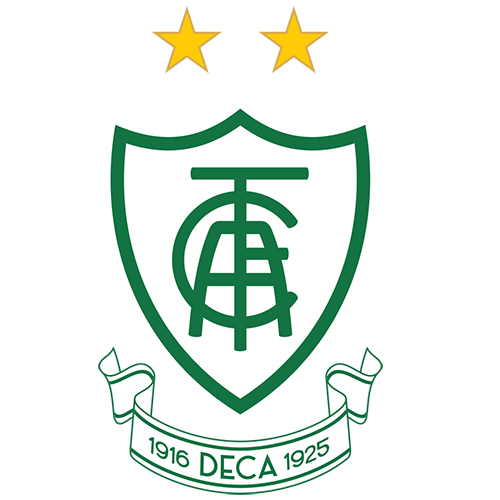
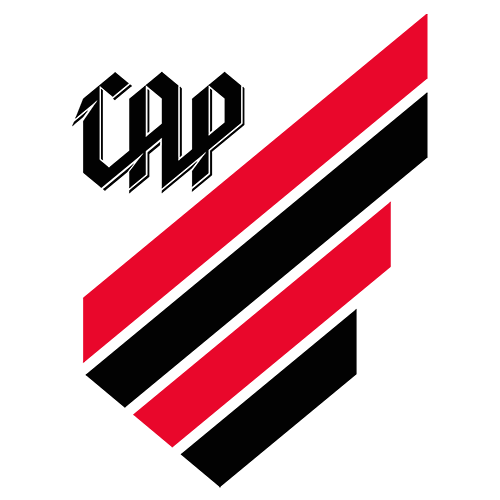
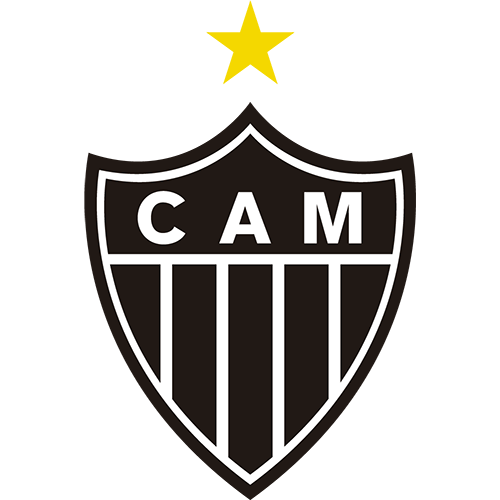
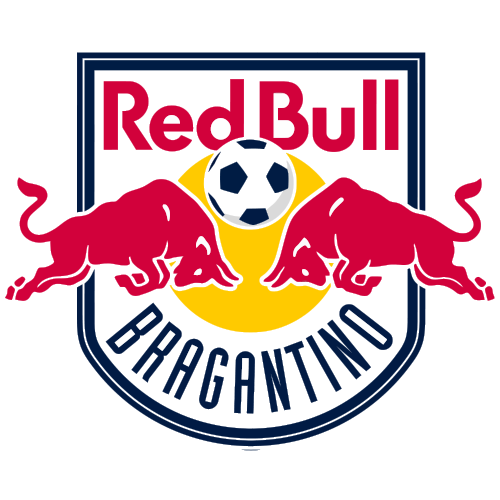
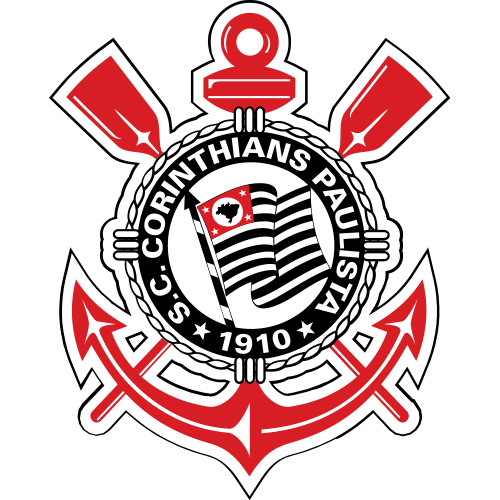
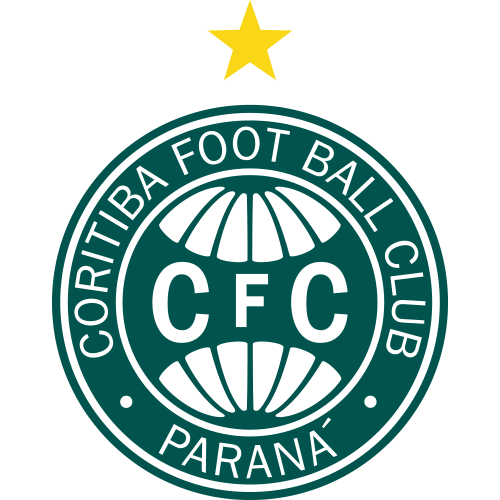
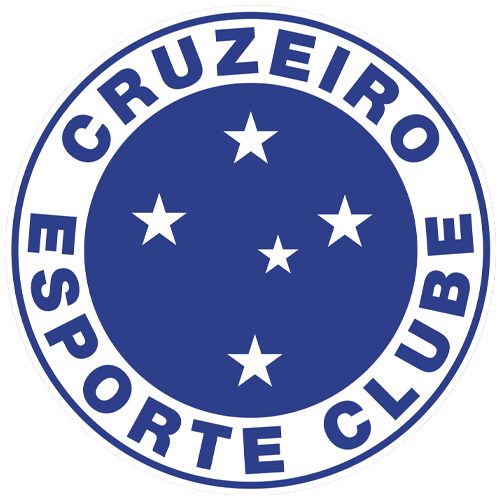
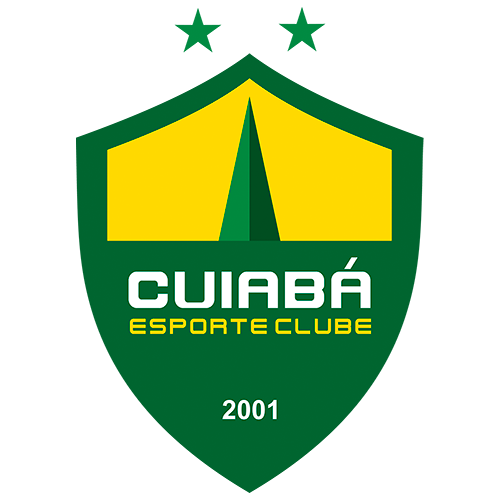
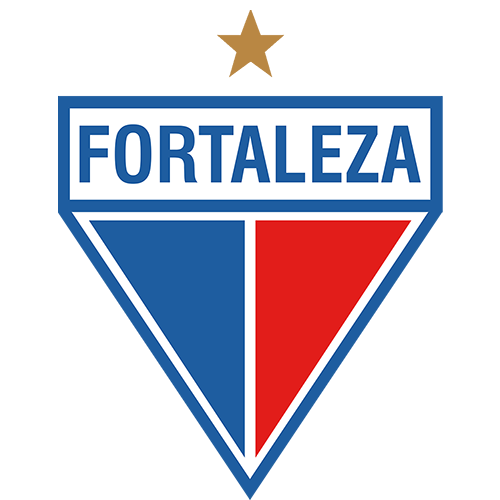
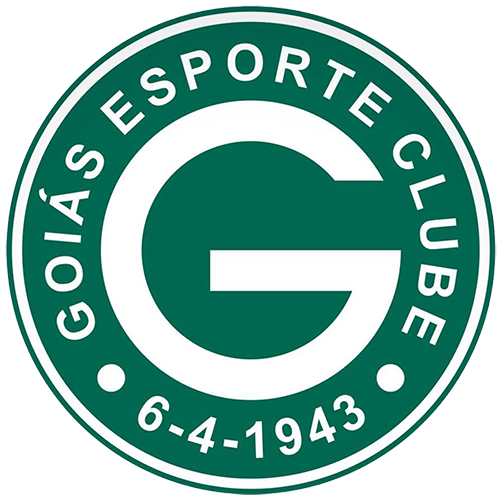
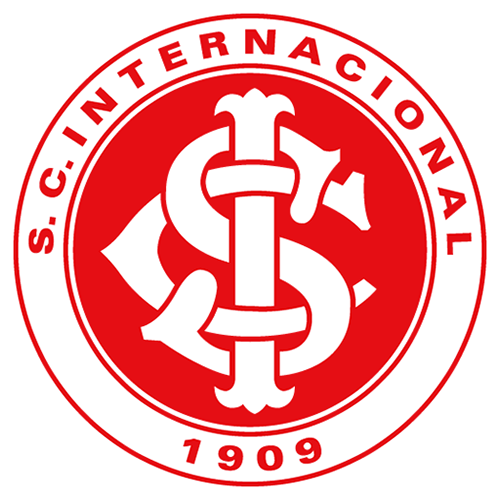
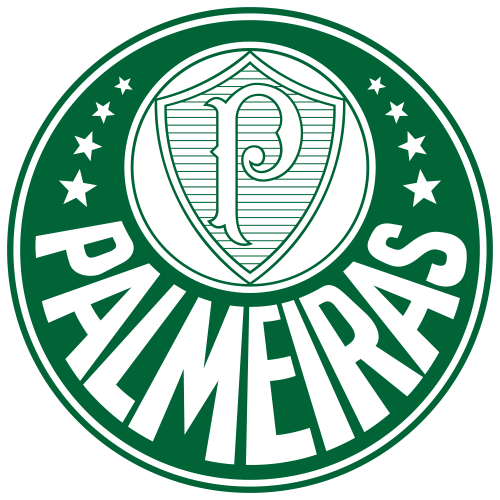
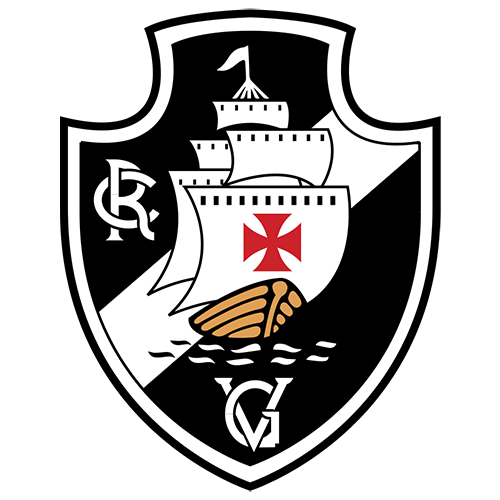

In [5]:
#Plotar o Mapa do Brasil para ver a localização de cada time
mapa

In [6]:
#Ler coordenadas estadios dos times
estadios = pd.read_csv('/content/drive/MyDrive/data_sets/futebol/estadios.csv', sep=';')
estadios.head()

Cl             Squad                                    Coord
0   1   América Mineiro     -19.908568980824, -43.91797947216970
1   2         Athletico  -25.448056571685500, -49.27650380664890
2   3  Atlético Mineiro                       -19.9301, -44.0138
3   4             Bahia                       -12.9790, -38.5042
4   5          Botafogo                       -22.8932, -43.2925

In [7]:
# Criando uma lista com todas as distâncias percorridas da serie A 2023 
distancias = []
times = estadios['Squad'].tolist()
# Loop para calcular a distância percorrida por cada time
for i in range(len(times)):
    dist = 0
    for j in range(len(times)):
        if i != j:
            # Calculando a distância entre os dois pontos
            dist += geodesic((estadios.loc[i,'Coord']), (estadios.loc[j,'Coord'])).km
    distancias.append(dist)

# Criando um novo dataframe com as distâncias percorridas por cada time
df_distancias = pd.DataFrame({
    'time': times,
    'distancia_percorrida': distancias
})
#Calculando a ida e volta
df_distancias['distancia_percorrida'] = df_distancias['distancia_percorrida']*2

print((df_distancias).round(2).sort_values(by='distancia_percorrida').reset_index(drop=True))

                time  distancia_percorrida
0         Bragantino              22563.97
1        Corinthians              22611.28
2          Palmeiras              22704.73
3          São Paulo              22808.22
4             Santos              23143.35
5           Botafogo              24393.63
6         Fluminense              24499.36
7      Vasco da Gama              24499.85
8           Flamengo              24502.44
9   Atlético Mineiro              25855.86
10   América Mineiro              25997.41
11          Cruzeiro              26019.72
12          Coritiba              29341.11
13         Athletico              29424.35
14             Goiás              36915.44
15            Gremio              44859.04
16     Internacional              45230.99
17             Bahia              54509.51
18            Cuiabá              56055.37
19         Fortaleza              85874.26


In [82]:
plt.figure(figsize=(10, 6))  # Definindo o tamanho da figura
plt.scatter(df_distancias['time'], df_distancias['distancia_percorrida'])  # Definindo os dados do scatterplot
plt.xlabel('Time')  # Definindo o rótulo do eixo x
plt.ylabel('Distância Percorrida')  # Definindo o rótulo do eixo y
plt.title('Distância Percorrida pelos Times')  # Definindo o título do gráfico
plt.xticks(rotation=90)  # Rotacionando os rótulos do eixo x em 90 graus, se necessário
plt.tight_layout()  # Ajustando o layout
plt.show()  # Exibindo o gráfico

In [89]:
#Criando a coluna com o nome do brasão
df_distancias['path'] = df_distancias['time'] + '.png'
df_distancias

time  distancia_percorrida                  path
0    América Mineiro          25997.412985   América Mineiro.png
1          Athletico          29424.353932         Athletico.png
2   Atlético Mineiro          25855.864010  Atlético Mineiro.png
3              Bahia          54509.510388             Bahia.png
4           Botafogo          24393.630853          Botafogo.png
5         Bragantino          22563.966447        Bragantino.png
6        Corinthians          22611.276844       Corinthians.png
7           Coritiba          29341.105823          Coritiba.png
8           Cruzeiro          26019.715321          Cruzeiro.png
9             Cuiabá          56055.374073            Cuiabá.png
10          Flamengo          24502.438014          Flamengo.png
11        Fluminense          24499.361130        Fluminense.png
12         Fortaleza          85874.260737         Fortaleza.png
13             Goiás          36915.441586             Goiás.png
14            Gremio          44859.035245            Gremio.png
15     Internacional          45230.991158     Internacional.png
16         Palmeiras          22704.731107         Palmeiras.png
17            Santos          23143.352701            Santos.png
18         São Paulo          22808.223039         São Paulo.png
19     Vasco da Gama          24499.845707     Vasco da Gama.png

In [95]:
#Adcionando os brasões ao ploter
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df_distancias['time'], df_distancias['distancia_percorrida'], color='white')
img ='/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/' #local onde estão os brasões
def getImage(path):
    return OffsetImage(plt.imread(img + path), zoom=.05, alpha = 1)

for index, row in df_distancias.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['time'], row['distancia_percorrida']), frameon=False)
    ax.add_artist(ab)

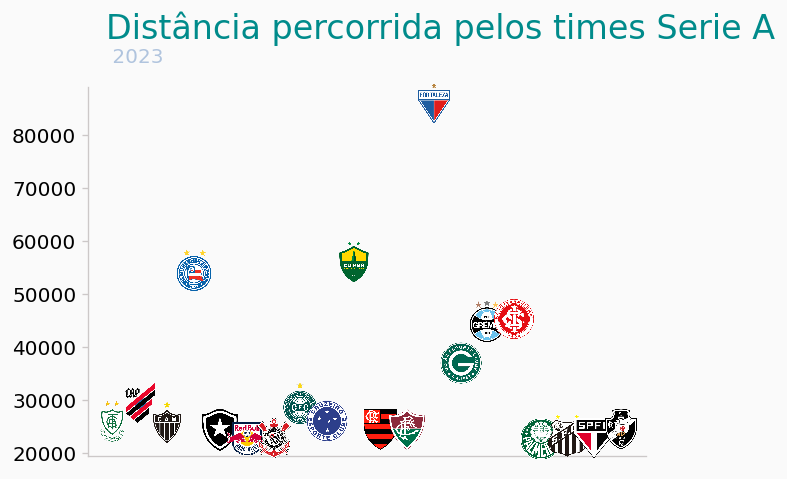

In [98]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#Personalizando o gráfico
# Definir fonte e cor de fundo
plt.rcParams.update({'font.monospace':'Courier'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df_distancias['time'], df_distancias['distancia_percorrida'])

# Ocultar informações do eixo x
ax.set_xticks([])

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
img ='/content/drive/MyDrive/data_sets/futebol/scatter_plot/images_br/' #local onde estão os brasões
def getImage(path):
    return OffsetImage(plt.imread(img + path), zoom=.05, alpha = 1)

for index, row in df_distancias.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['time'], row['distancia_percorrida']), frameon=False)
    ax.add_artist(ab)


# Text

## Title & comment
fig.text(.15,.98,'Distância percorrida pelos times Serie A' ,size=20, color='#008B8B')
fig.text(.15,.93,' 2023', size=12, color='#B0C4DE')


## Save plot
plt.savefig('xGChart.png', dpi=1200, bbox_inches = "tight")

In [8]:
#Pegando os dados dos campeões
url = 'https://pt.wikipedia.org/wiki/Lista_de_campe%C3%B5es_do_Campeonato_Brasileiro_de_Futebol'
resposta = requests.get(url)
soup = BeautifulSoup(resposta.text, 'html.parser')
tabela = soup.find('table', {'class': 'wikitable sortable'})

In [9]:
#converter em DF
campeoes = pd.read_html(str(tabela))[0]
campeoes.head()

Clube                                            Títulos  \
0    Palmeiras  11 (1960, 1967[nota 4], 1967[nota 3], 1969, 19...   
1       Santos  8 (1961, 1962, 1963, 1964, 1965, 1968[nota 3],...   
2  Corinthians      7 (1990, 1998, 1999, 2005, 2011, 2015 e 2017)   
3     Flamengo      7 (1980, 1982, 1983, 1992, 2009, 2019 e 2020)   
4    São Paulo            6 (1977, 1986, 1991, 2006, 2007 e 2008)   

                                               Vices  \
0                        4 (1970, 1978, 1997 e 2017)   
1  8 (1959, 1966, 1983, 1995, 2003, 2007, 2016 e ...   
2                              3 (1976, 1994 e 2002)   
3                               3 (1964, 2018, 2021)   
4            6 (1971, 1973, 1981, 1989, 1990 e 2014)   

                        Terceiro lugar  \
0                       2 (2019, 2021)   
1                3 (1974, 1998 e 2017)   
2  4 (1967[nota 3], 1969, 1993 e 2010)   
3                3 (1987, 2007 e 2016)   
4                3 (2003, 2004 e 2009)   

                                        Quarto lugar  \
0  7 (1964, 1965, 1968[nota 3], 1979, 2004, 2005 ...   
1                                           1 (2006)   
2                  5 (1971, 1972, 1982, 1984 e 2014)   
3                                           1 (2011)   
4                  5 (1993, 1999, 2012, 2015 e 2020)   

   Total entre os quatro primeiros  
0                               24  
1                               20  
2                               19  
3                               14  
4                               20

In [10]:
#Limpando as informações desnecessárias 
campeoes['Títulos'] = campeoes['Títulos'].str.replace(r'\(.*\)', '')
campeoes['Vices'] = campeoes['Vices'].str.replace(r'\(.*\)', '')
campeoes['Terceiro lugar'] = campeoes['Terceiro lugar'].str.replace(r'\(.*\)', '')
campeoes['Quarto lugar'] = campeoes['Quarto lugar'].str.replace(r'\(.*\)', '')

In [11]:
#Converter os dados no tipo correto
campeoes['Títulos'] = campeoes['Títulos'].astype(int)
campeoes['Vices'] = campeoes['Vices'].astype(int)
campeoes['Terceiro lugar'] = campeoes['Terceiro lugar'].astype(int)
campeoes['Quarto lugar'] = campeoes['Quarto lugar'].astype(int)

In [12]:
#Criar DF com o Times que chegaram no G4
times = campeoes['Clube']

times

0                Palmeiras
1                   Santos
2              Corinthians
3                 Flamengo
4                São Paulo
5                 Cruzeiro
6            Vasco da Gama
7               Fluminense
8            Internacional
9         Atlético Mineiro
10                  Grêmio
11                Botafogo
12                   Bahia
13                 Guarani
14    Athletico Paranaense
15                Coritiba
16                   Sport
17             São Caetano
18               Fortaleza
19                 Náutico
20                 Vitória
21              Bragantino
22              Portuguesa
23                   Bangu
24                 America
25                   Goiás
26                   Ceará
27             Operário-MS
28             Ponte Preta
29       Brasil de Pelotas
30              Santa Cruz
31                Londrina
Name: Clube, dtype: object

In [13]:
#Agrupando os times por regiões
regioes = {
    'Palmeiras'           : 'Sudeste',
    'Santos'              : 'Sudeste',
    'Corinthians'         : 'Sudeste',
    'Flamengo'            : 'Sudeste',
    'São Paulo'           : 'Sudeste',
    'Cruzeiro'            : 'Sudeste',
    'Vasco da Gama'       : 'Sudeste',
    'Fluminense'          : 'Sudeste',
    'Internacional'       : 'Sul',
    'Atlético Mineiro'    : 'Sudeste',
    'Grêmio'              : 'Sul',
    'Botafogo'            : 'Sudeste',
    'Bahia'               : 'Nordeste',
    'Guarani'             : 'Sudeste',
    'Athletico Paranaense': 'Sul',
    'Coritiba'            : 'Sul',
    'Sport'               : 'Nordeste',
    'São Caetano'         : 'Sudeste',
    'Fortaleza'           : 'Nordeste',
    'Náutico'             : 'Nordeste',
    'Vitória'             : 'Nordeste',
    'Bragantino'          : 'Sudeste',
    'Portuguesa'          : 'Sudeste',
    'Bangu'               : 'Sudeste',
    'America'             : 'Sudeste',
    'Goiás'               : 'Centro',
    'Ceará'               : 'Nordeste',
    'Operário-MS'         : 'Centro',
    'Ponte Preta'         : 'Sudeste',
    'Brasil de Pelotas'   : 'Sul',
    'Santa Cruz'          : 'Nordeste',
    'Londrina'            : 'Sul',}

In [14]:
#Criando a coluna Região para os respectivos times
campeoes['Regiao'] = campeoes['Clube'].apply(lambda x: regioes[x])
campeoes= campeoes.rename(columns={'Clube': 'Time'})
campeoes.head()

Time  Títulos  Vices  Terceiro lugar  Quarto lugar  \
0    Palmeiras       11      4               2             7   
1       Santos        8      8               3             1   
2  Corinthians        7      3               4             5   
3     Flamengo        7      3               3             1   
4    São Paulo        6      6               3             5   

   Total entre os quatro primeiros   Regiao  
0                               24  Sudeste  
1                               20  Sudeste  
2                               19  Sudeste  
3                               14  Sudeste  
4                               20  Sudeste

In [15]:
#informando de qual região tem o maior número de campeoes
cam_regiao = campeoes.groupby('Regiao')['Títulos'].agg('sum').sort_values(ascending=False).reset_index()
print(cam_regiao)

     Regiao  Títulos
0   Sudeste       56
1       Sul        7
2  Nordeste        3
3    Centro        0


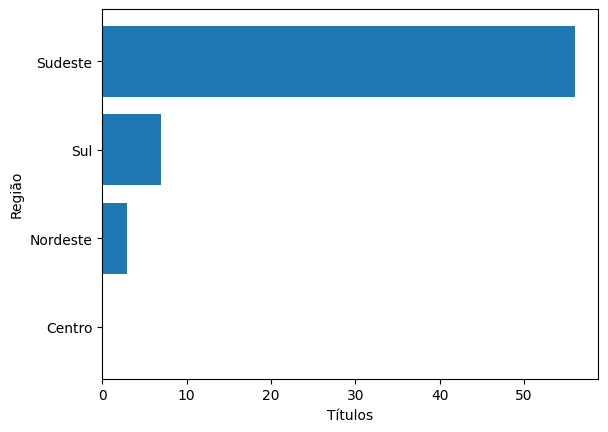

In [16]:
#plotar um gráfico
plt.barh(cam_regiao['Regiao'], cam_regiao['Títulos'])

# Inverter a ordem dos eixos x e y
plt.gca().invert_yaxis()

# Adicionar rótulos aos eixos
plt.xlabel('Títulos')
plt.ylabel('Região')

# Exibir o gráfico
plt.show()



In [62]:
#Ler o DF com o valor dos times feito pela https://www.sportsvalue.com.br/
valuation = pd.read_csv('/content/drive/MyDrive/data_sets/futebol/valuation2.csv', sep=';')

valuation.head(10)


Time  Valor
0          Flamengo   3787
1         Palmeiras   3410
2  Atlético Mineiro   3127
3       Corinthians   2991
4     Internacional   2314
5         São Paulo   2214
6         Athletico   2094
7            Santos   1415
8            Grêmio   1407
9        Fluminense   1399

In [63]:
valuation['Valor'] = valuation['Valor'].astype(int) 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Flamengo'),
  Text(1, 0, 'Palmeiras'),
  Text(2, 0, 'Atlético Mineiro'),
  Text(3, 0, 'Corinthians'),
  Text(4, 0, 'Internacional'),
  Text(5, 0, 'São Paulo'),
  Text(6, 0, 'Athletico'),
  Text(7, 0, 'Santos'),
  Text(8, 0, 'Grêmio'),
  Text(9, 0, 'Fluminense')])

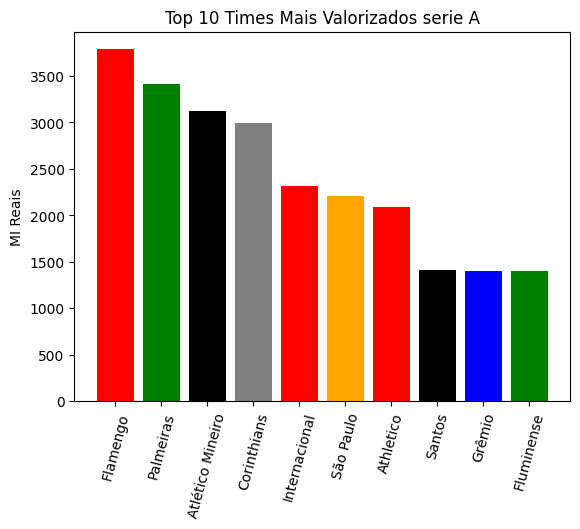

In [66]:
#Plotar gráfico com os Top 10 times mais valorizados da Série A

# Selecionando os top 10 times mais valorizados.
top_10 = valuation.nlargest(10, "Valor")

# Gerando as cores para cada barra.
colors = ['red', 'green', 'black', 'gray', 'red', 'orange', 'red', 'black', 'blue', 'green']

# Criando o gráfico de barras.
plt.bar(top_10['Time'], top_10['Valor'], color=colors)

# Configurando o título e os rótulos dos eixos.
plt.title('Top 10 Times Mais Valorizados serie A')
plt.ylabel('MI Reais')

# Rotacionando os rótulos do eixo x para evitar sobreposição.
plt.xticks(rotation=75)


In [20]:
#coordenadas separadas
coord = pd.read_csv('/content/drive/MyDrive/data_sets/futebol/estadios_1.csv', sep=';')
coord['Lat'] = coord['Lat'].str.replace(',', '.')
coord['Lon'] = coord['Lon'].str.replace(',', '.')
coord = coord.rename(columns={'Squad': 'Time'})
coord

Cl              Time           Lat           Lon
0    1   América Mineiro  -19.90856898  -43.91797947
1    2         Athletico  -25.44805657  -49.27650381
2    3  Atlético Mineiro      -19.9301      -44.0138
3    4             Bahia       -12.979      -38.5042
4    5          Botafogo      -22.8932      -43.2925
5    6        Bragantino  -22.96518763  -46.53660337
6    7       Corinthians      -23.5451      -46.4741
7    8          Coritiba  -25.42080658  -49.25946338
8    9          Cruzeiro  -19.86566517  -43.97080964
9   10            Cuiabá  -15.60381272  -56.12112025
10  11          Flamengo  -22.91189147  -43.22946916
11  12        Fluminense      -22.9118      -43.2308
12  13         Fortaleza  -3.807069293  -38.52200395
13  14             Goiás  -16.69828079  -49.23234966
14  15            Gremio  -29.97377361   -51.1942539
15  16     Internacional  -30.06526387  -51.23513044
16  17         Palmeiras  -23.52740427  -46.67787612
17  18            Santos  -23.95081847  -46.33850744
18  19         São Paulo  -23.60075211  -46.71952444
19  20     Vasco da Gama       -22.913       -43.231

In [67]:
#Agrupando os datasets
Base_Dados = pd.merge(campeoes, coord, on='Time', how='left')
Base_Dados = pd.merge(Base_Dados, valuation, on='Time', how='left')

Base_Dados.drop(['Cl'], axis=1, inplace=True) 
Base_Dados

Time  Títulos  Vices  Terceiro lugar  Quarto lugar  \
0              Palmeiras       11      4               2             7   
1                 Santos        8      8               3             1   
2            Corinthians        7      3               4             5   
3               Flamengo        7      3               3             1   
4              São Paulo        6      6               3             5   
5               Cruzeiro        4      5               6             3   
6          Vasco da Gama        4      4               2             2   
7             Fluminense        4      0               5             6   
8          Internacional        3      8               7             3   
9       Atlético Mineiro        2      5               7             5   
10                Grêmio        2      3               9             7   
11              Botafogo        2      3               1             5   
12                 Bahia        2      2               0             1   
13               Guarani        1      2               2             0   
14  Athletico Paranaense        1      1               1             1   
15              Coritiba        1      0               1             1   
16                 Sport        1      0               0             1   
17           São Caetano        0      2               0             1   
18             Fortaleza        0      2               0             1   
19               Náutico        0      1               2             2   
20               Vitória        0      1               1             0   
21            Bragantino        0      1               0             1   
22            Portuguesa        0      1               0             1   
23                 Bangu        0      1               0             0   
24               America        0      0               1             1   
25                 Goiás        0      0               1             1   
26                 Ceará        0      0               1             0   
27           Operário-MS        0      0               1             0   
28           Ponte Preta        0      0               1             0   
29     Brasil de Pelotas        0      0               1             0   
30            Santa Cruz        0      0               0             2   
31              Londrina        0      0               0             1   

    Total entre os quatro primeiros    Regiao           Lat           Lon  \
0                                24   Sudeste  -23.52740427  -46.67787612   
1                                20   Sudeste  -23.95081847  -46.33850744   
2                                19   Sudeste      -23.5451      -46.4741   
3                                14   Sudeste  -22.91189147  -43.22946916   
4                                20   Sudeste  -23.60075211  -46.71952444   
5                                18   Sudeste  -19.86566517  -43.97080964   
6                                12   Sudeste       -22.913       -43.231   
7                                15   Sudeste      -22.9118      -43.2308   
8                                20       Sul  -30.06526387  -51.23513044   
9                                19   Sudeste      -19.9301      -44.0138   
10                               21       Sul           NaN           NaN   
11                               11   Sudeste      -22.8932      -43.2925   
12                                5  Nordeste       -12.979      -38.5042   
13                                5   Sudeste           NaN           NaN   
14                                4       Sul           NaN           NaN   
15                                3       Sul  -25.42080658  -49.25946338   
16                                2  Nordeste           NaN           NaN   
17                                3   Sudeste           NaN           NaN   
18                                3  Nordeste  -3.807069293  -38.52200395   
19                                5  

In [68]:
# Mapa de Calor Geografico em relação ao valor dos times

px.density_mapbox(
    Base_Dados,
    lat='Lat',
    lon='Lon',
    z='Valor',
    radius=30,
    center=dict(lat=-23.700, lon=-46.5555),
    zoom=4,
    mapbox_style='open-street-map'
)

In [69]:
#Agrupando os times por região e somando o valor
regiao = Base_Dados.groupby('Regiao')['Valor'].sum().reset_index()
print(regiao)

     Regiao    Valor
0    Centro    306.0
1  Nordeste   2541.0
2   Sudeste  22018.0
3       Sul   4211.0


In [70]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


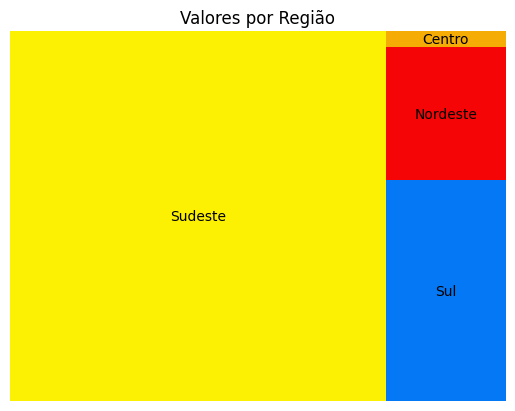

In [75]:
import squarify

# Ordenando o DataFrame por valor em ordem decrescente.
regiao = regiao.sort_values('Valor', ascending=False)

# Configurando a área total do treemap.
total_value = regiao['Valor'].sum()

# Calculando o tamanho de cada retângulo proporcionalmente ao valor.
sizes = (regiao['Valor'] / total_value) * 100

# Definindo manualmente as cores para cada região.
colors = ['#fcf003', '#0579f5', '#f50505', '#f5ad05', ]

# Criando o treemap.
squarify.plot(sizes=sizes, label=regiao['Regiao'], color=colors)

# Configurando o título.
plt.title('Valores por Região')

# Removendo os eixos.
plt.axis('off')

# Exibindo o treemap.
plt.show()

In [72]:
campeoes.fillna(0, inplace=True)
df_distancias.fillna(0, inplace=True)
valuation.fillna(0, inplace=True)

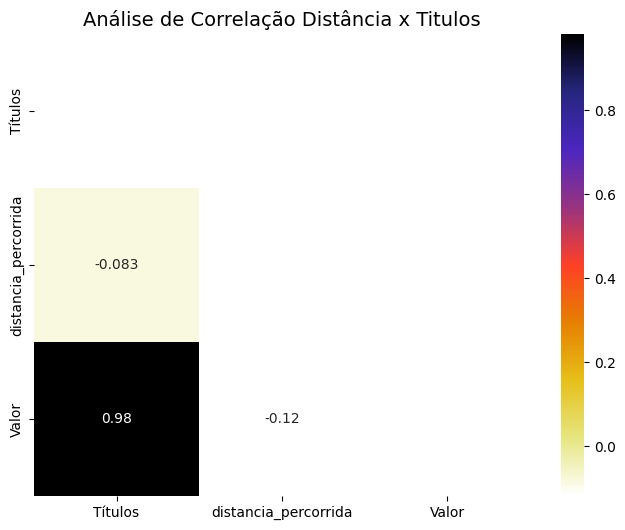

In [79]:
# Selecionando as colunas relevantes nos DataFrames
campeoes_selecionado = Base_Dados['Títulos']
distancias_selecionado = df_distancias['distancia_percorrida']
valuation_selecionado = valuation['Valor']

# Criando um DataFrame com as colunas selecionadas
data = pd.DataFrame({'Títulos': campeoes_selecionado,
                     'distancia_percorrida': distancias_selecionado,
                     'Valor': valuation_selecionado})



# Plot
Figura, Eixo = plt.subplots( figsize=(8, 6) )

# Calculando a correlação entre as colunas
correlation_df = data.corr()

# Gere uma máscara para o triângulo superior
mask = np.zeros_like( correlation_df )
mask[ np.triu_indices_from(mask) ] = True

# Titulo
plt.title('Análise de Correlação Distância x Titulos', loc='center', fontsize=14)

# Plot
sns.heatmap(
    correlation_df, 
    mask=mask, 
    cmap='CMRmap_r',
    annot=True,
    );